In [1]:
import json
import numpy as np
from pprint import pprint

In [2]:
with open("../../datasets/VG-SGG-dicts.json") as f:
    dt = json.load(f)

In [3]:
def ret_rel_for_ind(ind, ab):
    i1, i2, i3 = np.unravel_index(ind, ab.shape)
    s = dt["idx_to_label"][str(i1)] if i1 != 0 else "_bg_"
    o = dt["idx_to_label"][str(i2)] if i2 != 0 else "_bg_"
    r = dt["idx_to_predicate"][str(i3)] if i3 != 0 else "_bg_"
    return "{}-{}-{}".format(s, r, o), ab[i1, i2, i3]

In [4]:
def rels_from_mat(mat):
    return [ ret_rel_for_ind(ag, mat) for ag in np.argsort(np.reshape(mat, -1)) ]

In [7]:
hid = np.load("../../datasets/hid/descriptions_freq.npy")
rels_nhidf = rels_from_mat(hid)

In [8]:
coco = np.load("../../datasets/coco/mscoco_captions_freq.npy")
rels_coco = rels_from_mat(coco)

In [9]:
vgp = np.load("../../datasets/vg/vg_prior_freq.npy")
rels_vgp = rels_from_mat(vgp)

In [10]:
np.sum(hid) / 110972

0.624247557942544

In [11]:
# multiple relations from same sentence though reflecting multiple parses
np.sum(coco) / 1233676

0.6313294576533871

In [12]:
# rels_coco[-10:]
# rels_coco[:10]

In [13]:
def get_distr_rels(subj, obj, mat):
    sidx = dt["label_to_idx"][subj]
    oidx = dt["label_to_idx"][obj]
    
    vals = mat[sidx, oidx, :]
    vals[0] = 0
    vals += 1
    vals = vals / np.sum(vals)
    labels = ["_bg_"] + [dt["idx_to_predicate"][str(i+1)] for i in range(50)]
    return vals, labels 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
sorted(list(dt["label_to_idx"].keys()))

['airplane',
 'animal',
 'arm',
 'bag',
 'banana',
 'basket',
 'beach',
 'bear',
 'bed',
 'bench',
 'bike',
 'bird',
 'board',
 'boat',
 'book',
 'boot',
 'bottle',
 'bowl',
 'box',
 'boy',
 'branch',
 'building',
 'bus',
 'cabinet',
 'cap',
 'car',
 'cat',
 'chair',
 'child',
 'clock',
 'coat',
 'counter',
 'cow',
 'cup',
 'curtain',
 'desk',
 'dog',
 'door',
 'drawer',
 'ear',
 'elephant',
 'engine',
 'eye',
 'face',
 'fence',
 'finger',
 'flag',
 'flower',
 'food',
 'fork',
 'fruit',
 'giraffe',
 'girl',
 'glass',
 'glove',
 'guy',
 'hair',
 'hand',
 'handle',
 'hat',
 'head',
 'helmet',
 'hill',
 'horse',
 'house',
 'jacket',
 'jean',
 'kid',
 'kite',
 'lady',
 'lamp',
 'laptop',
 'leaf',
 'leg',
 'letter',
 'light',
 'logo',
 'man',
 'men',
 'motorcycle',
 'mountain',
 'mouth',
 'neck',
 'nose',
 'number',
 'orange',
 'pant',
 'paper',
 'paw',
 'people',
 'person',
 'phone',
 'pillow',
 'pizza',
 'plane',
 'plant',
 'plate',
 'player',
 'pole',
 'post',
 'pot',
 'racket',
 'railin

In [23]:
sorted(list(dt["predicate_to_idx"].keys()))

['above',
 'across',
 'against',
 'along',
 'and',
 'at',
 'attached to',
 'behind',
 'belonging to',
 'between',
 'carrying',
 'covered in',
 'covering',
 'eating',
 'flying in',
 'for',
 'from',
 'growing on',
 'hanging from',
 'has',
 'holding',
 'in',
 'in front of',
 'laying on',
 'looking at',
 'lying on',
 'made of',
 'mounted on',
 'near',
 'of',
 'on',
 'on back of',
 'over',
 'painted on',
 'parked on',
 'part of',
 'playing',
 'riding',
 'says',
 'sitting on',
 'standing on',
 'to',
 'under',
 'using',
 'walking in',
 'walking on',
 'watching',
 'wearing',
 'wears',
 'with']

<BarContainer object of 51 artists>

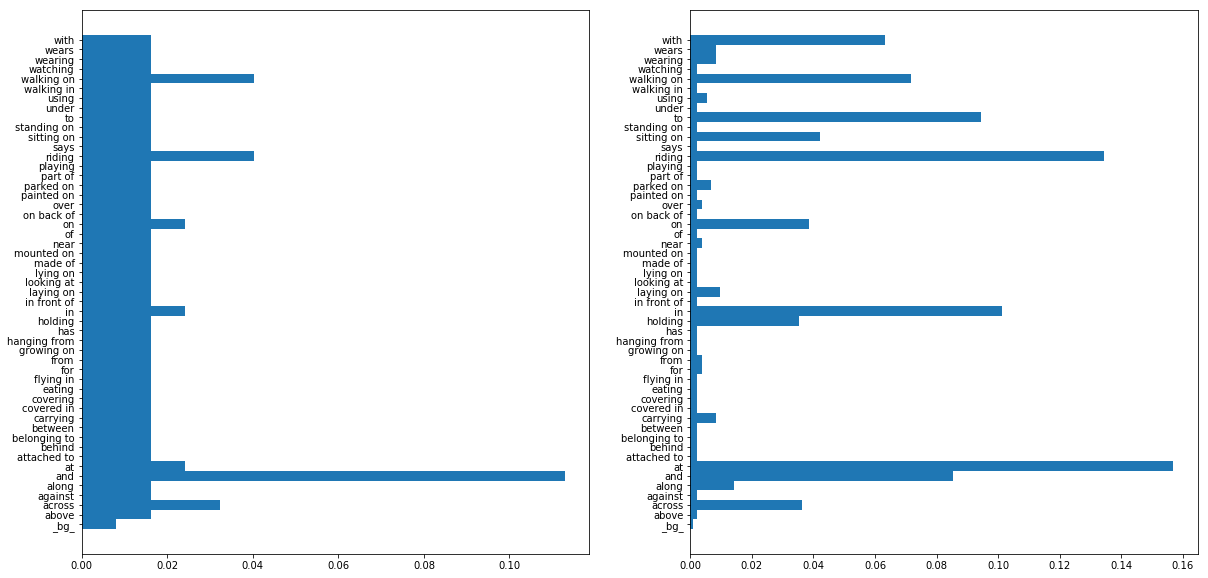

In [32]:
vals1, labs = get_distr_rels("person", "street", hid)
vals2, _ = get_distr_rels("person", "street", coco)

# vals1, labs = get_distr_rels("hand", "glove", coco)
# vals2, _ = get_distr_rels("hand", "glove", vgp)

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.barh(
    np.arange(len(vals1)), 
    vals1, 
    tick_label=labs, 
    height=1.0,
    align="center",
)
plt.subplot(1, 2, 2)
# plt.figure(figsize=(10,10))
plt.barh(
    np.arange(len(vals2)), 
    vals2, 
    tick_label=labs, 
    height=1.0,
    align="center",
)

In [18]:
# labs
# dt["label_to_idx"]["man"]
# dt["predicate_to_idx"]["covered in"]
# coco[78, 81, 12]

In [19]:
# cps = np.load("mscoco_captions.npy")

In [20]:
# for svo in cps:
#     if "cover in" in svo[1]:
#         print(svo)

In [21]:
nhid = hid.copy()
ncoco = coco.copy()

nhid[:, :, 0] = 0
ncoco[:, :, 0] = 0

nhid += 1
ncoco += 1

nhid = nhid / np.sum(nhid, axis=2, keepdims=True)
ncoco = ncoco / np.sum(ncoco, axis=2, keepdims=True)

diff_c = np.mean(np.max(nhid, axis=2) - np.max(ncoco, axis=2))

In [22]:
diff_c

-0.040193979814624886